### 제주 한달살기 여행자 유형 분류 

1. 네이버를 통해 제주 한달살기, 한달살이 블로그 내용 수집
    - 1937건의 블로그 수집
2. 크롤링 결과를 바탕으로 한달살기 여행자들의 

3. 분류방법 
    - 토픽모델링
    - 위계적 군집분석
    - K-Means 군집분석

In [6]:
# !pip install matplotlib seaborn sklearn konlpy scikit-learn wordcloud pyLDAvis gensim

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re

from wordcloud import WordCloud, STOPWORDS

from konlpy.tag import Okt
okt = Okt() 
from collections import Counter

plt.rc('font', family='malgun Gothic') 

In [7]:
df = pd.read_csv('./data/naver_month.csv')
df

,title,contents,time,blog_text,key
0,돌아기랑 제주도한달살기 24일째(406일) : 비양도,첨에 제주도 한달살기 올때도 어디갈지 생각을 안하고 와서 매번 전날이나 아침에 오늘...,2023.11.27,첨에 제주도 한달살기 올때도 어디갈지 생각을 안하고 와서 매번 전날이나 아침에 오늘...,한달살기
1,"제주도 한달살기 (20) - 우도 코코나라, 문빵구, 돌담집, 몬딱...",한달살기 중 두번째 우도 ㅎㅎ 처음은 전기차를 빌렸지만 이번엔 카트형식으로 나란히 ...,2023.11.07,한달살기 중 두번째 우도 ㅎㅎ처음은 전기차를 빌렸지만 이번엔 카트형식으로 나란히 앉...,한달살기
2,제주동쪽숙소 제주도한달살기하기 좋은 구좌 제주오션뷰2차♪,#제주오션뷰2차 #제주도펜션 #제주동쪽숙소 제주에는 크게 동쪽과 서쪽으로 나뉘면서 ...,2023.12.13,#제주오션뷰2차#제주도펜션#제주동쪽숙소제주에는 크게 동쪽과 서쪽으로 나뉘면서 다양한...,한달살기
3,제주도 한달살기 비용 (한달살이 생활비),제주도 한달살기는 돈이 적게 들지는 않지만 우리 가족에게 꽤 많은 추억을 남겼으므로...,2022.02.23,"2021년 4월에 제주도 한달살기를 하고 왔다.세식구 기준(어른 둘, 아기 하나)으...",한달살기
4,제주도 한달살기 숙소 비용 제주 중문 애견동반 더맨션 이이공공,그중에서도 제일 마음에 들었던 건 오후 시간 깊숙이 들어오는 가을 햇살 창밖에 보이...,2023.10.14,이번에는 좀 여유로운 여행을 하고 싶어서다소 긴 일정으로 제주도에 방문했어요.여행...,한달살기
...,...,...,...,...,...
1932,제주도한달살이,드뎌 육지다~ 뒤로 보이는 육지가 제주항이네요. 3다도인 제주에 좋은 추억도 많이 ...,2020.12.18,#제주도 #제주한달살이#실버크클라우드코로나19로 발이묶인 윈드서퍼들의차선택은~~ 한...,한달살이
1933,[제주도 한달살이] 제주도 게스트하우스 스텝 후기...,"연돈 예약 성공해서 연돈도 먹고, 한라산 등산도 가고, 스쿠버다이빙도 배우고, 저녁...",2023.05.28,22년12월28일~23년2월4일약 한달동안 제주살이를 했다.(글 마지막에 스텝 꿀팁...,한달살이
1934,제주도 한달살이 시작!!!,무계획으로 출발 하는 제주도 한달살이!!! 퇴사를 하고 나니 새로운 환경에서 살아보...,2022.03.16,무계획으로 출발 하는 제주도 한달살이!!!퇴사를 하고 나니 새로운 환경에서 살아보고...,한달살이
1935,[제주도 한달살이 이야기] 평산제면소에서 마제소바먹고 러닝후...,제주도에선 술 잘 안먹겠다고 다짐했는데 거의 하루 한캔은 아니여도 한모금씩은 매일 ...,2022.02.20,오늘은 숙소 근처에 있다는 마제소바 집에 들렸어요맛집이라고 해서 저번에 왔었는데그때...,한달살이


In [8]:
# df 수집 오류 결과 확인
print('df 수집 오류 결과 확인')
print((df == 'error').sum())

print('-----------------')
# blog_text가 nan인 행 존재 -> 제외
print(' blog_text가 nan인 행')
print(df.isnull().sum())

df 수집 오류 결과 확인
title        0
contents     0
time         0
blog_text    0
key          0
dtype: int64
-----------------
 blog_text가 nan인 행
title        0
contents     0
time         0
blog_text    3
key          0
dtype: int64


In [9]:
df = df[df['blog_text'].isna() != 1]
df.info()
# 총 1934 개의 글이 분석대상

<class 'pandas.core.frame.DataFrame'>
Index: 1934 entries, 0 to 1936
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      1934 non-null   object
 1   contents   1934 non-null   object
 2   time       1934 non-null   object
 3   blog_text  1934 non-null   object
 4   key        1934 non-null   object
dtypes: object(5)
memory usage: 90.7+ KB


## 분류 1 - TOPIC modeling

In [10]:
from gensim.models.ldamodel import LdaModel
from gensim.models.callbacks import CoherenceMetric
from gensim import corpora
from gensim.models.callbacks import PerplexityMetric


import pickle
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

In [11]:
def hangul_function(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 한글 추출 규칙: 띄어 쓰기(1 개)를 포함한 한글
    result = hangul.sub('', text)  # 위에 설정한 "hangul"규칙을 "text"에 적용(.sub)시킴
    return result

In [12]:
stopwords = set([])

web_stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
web_stopwords[:10]

for i in web_stopwords:
    stopwords.add(i[0])

print(len(stopwords))

jeju_stopwords = [ '리뷰', '숙소', '정말', '동안', '다음', '바로', '근처', '조금', '시간',
                   '호스트', '정도', '방문', '사장', '이용', '다시', '예약', '살이', '살기', '아주', '추천', '하루', '이번',
                   '처음', '달동', '저희', '하나', '사용', '모두', '진짜', '일주일', '보름', '선택', '시작', '한번', '가장', '마음',
                   '제외', '이동', '무엇', '준비', '그냥', '감사',  '덕분', '후기', '기회',  '다른', '여기', '우리',
                   '미스터', '미스터멘션', '멘션', '때문', '오늘', '도착', '보고', '마지막', '가지', '이제', '지금', '모습', '위해',
                   '타고', '사실', '포스팅', '주문', '역시', '침대', '거실', '매일', '출발', '소개', '기억', '참고', '계속', '객실',
                   '일차', '이야기', '요즘', '이유', '경우', '일단', '거의', '스텝', '제일', '자주', '어디', '마무리', '아래', '운영',
                   '이상', '의자', '별로', '원래', '중간', '뭔가', '첫째', '체크', '잠시', '언제', '살짝', '해도', '계단', '부분', '냉장고',
                   '침실', '기본', '제공', '일찍', '인테리어', '완전', '추가', '등등', '매우', '가야', '그때', '기간', '마치', '가득', '대부분',
                   '미리', '둘째', '근무', '공간', '스테이', '알파', '엄마', '아빠', '아들', '일정', '계획', '아침', '주방', '서울', '육지',
                   '점심', '저녁', '자리', '두리', '언니', '가격', '건물', '숙박', '만원', '가기', '코로나' , '창문', '문의', '라운드',          
                   '호텔', '펜션', '게스트하우스', '독채','화장실', '욕실', '숙박', '세탁기', '가면', '직접', '비용', '길이',
                    '여행', '트립', '제주', '제주도', '생각', '느낌',
                    '광고', '스텝', '블로그', '개월', '도서관', '스탭'
                   ]
for word in jeju_stopwords:
    stopwords.add(word)

print(len(stopwords))

594
742


In [13]:
temp_list = []
for blog in df['blog_text']:
    LDA_nous = okt.nouns(hangul_function(blog))
    LDA_nous = [x for x in LDA_nous if len(x) > 1]  # 한글자 키워드 제거    
    LDA_nous = [word for word in LDA_nous if not word in stopwords]
    temp_list.append(LDA_nous)

dictionary = corpora.Dictionary(temp_list)
dictionary.filter_extremes(no_below=2, no_above=0.5)
corpus_LDA = [dictionary.doc2bow(text) for text in temp_list]

cluster_num = 5
chunksize = 2000
passes = 20
iterations = 400
eval_every = None

temp = dictionary[0]
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus_LDA,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=cluster_num,
    passes=passes,
    eval_every=eval_every
)

lda_visualization = gensimvis.prepare(model, corpus_LDA, dictionary, sort_topics=True)
pyLDAvis.save_html(lda_visualization, './result/type_topic_ver1.html')

In [47]:
df_topic = pd.DataFrame(model.print_topics())
df_topic.columns = ['group', 'topic']
df_topic

,group,topic
0,0,"0.021*""카페"" + 0.011*""맛집"" + 0.010*""사람"" + 0.009*""..."
1,1,"0.010*""하우스"" + 0.008*""서귀포"" + 0.007*""위치"" + 0.006..."
2,2,"0.010*""우도"" + 0.006*""바다"" + 0.006*""차량"" + 0.006*""..."
3,3,"0.016*""바다"" + 0.008*""사람"" + 0.006*""함덕"" + 0.005*""..."
4,4,"0.014*""올레길"" + 0.010*""코스"" + 0.009*""사람"" + 0.008*..."
5,5,"0.020*""오름"" + 0.011*""코스"" + 0.007*""숲길"" + 0.006*""..."


In [65]:
temp = df_topic['topic'].str.split('+', expand=True)
for i in range(10):    
    temp.rename(columns= {i: f'topic_{i}'}, inplace= True)
    temp[[f'topic_{i}_rate', f'topic_{i}_key']] = temp[f'topic_{i}'].str.split('*', expand=True)
    temp.drop(columns= f'topic_{i}', inplace=True)
    temp[f'topic_{i}_key'] = temp[f'topic_{i}_key'].apply(lambda x: x.replace('"', ''))
    
temp.reset_index(inplace=True)
temp.rename(columns={'index' : 'group'}, inplace=True)
temp

,group,topic_0_rate,topic_0_key,topic_1_rate,topic_1_key,topic_2_rate,topic_2_key,topic_3_rate,topic_3_key,topic_4_rate,...,topic_5_rate,topic_5_key,topic_6_rate,topic_6_key,topic_7_rate,topic_7_key,topic_8_rate,topic_8_key,topic_9_rate,topic_9_key
0,0,0.021,카페,0.011,맛집,0.010,사람,0.009,바다,0.008,...,0.005,구경,0.005,메뉴,0.005,날씨,0.005,식당,0.005,커피
1,1,0.010,하우스,0.008,서귀포,0.007,위치,0.006,커피,0.005,...,0.005,거리,0.005,가족,0.005,주차,0.004,시설,0.004,카페
2,2,0.010,우도,0.006,바다,0.006,차량,0.006,날씨,0.006,...,0.005,체험,0.005,카페,0.005,벚꽃,0.005,폭포,0.004,해변
3,3,0.016,바다,0.008,사람,0.006,함덕,0.005,해수욕장,0.005,...,0.005,위치,0.005,카페,0.004,생활,0.004,마당,0.004,하우스
4,4,0.014,올레길,0.010,코스,0.009,사람,0.008,친구,0.007,...,0.006,체험,0.005,한라산,0.005,서귀포,0.004,식사,0.004,가족
5,5,0.020,오름,0.011,코스,0.007,숲길,0.006,풍경,0.006,...,0.006,사람,0.006,나무,0.005,정상,0.005,식당,0.005,마을


In [16]:
df_topic = temp
df_topic.to_csv('./result/type_topic_ver1.csv', index = False)

In [17]:
df_topic

,group,topic_0_rate,topic_0_key,topic_1_rate,topic_1_key,topic_2_rate,topic_2_key,topic_3_rate,topic_3_key,topic_4_rate,...,topic_5_rate,topic_5_key,topic_6_rate,topic_6_key,topic_7_rate,topic_7_key,topic_8_rate,topic_8_key,topic_9_rate,topic_9_key
0,0,0.021,카페,0.011,맛집,0.010,사람,0.009,바다,0.008,...,0.005,구경,0.005,메뉴,0.005,날씨,0.005,식당,0.005,커피
1,1,0.010,하우스,0.008,서귀포,0.007,위치,0.006,커피,0.005,...,0.005,거리,0.005,가족,0.005,주차,0.004,시설,0.004,카페
2,2,0.010,우도,0.006,바다,0.006,차량,0.006,날씨,0.006,...,0.005,체험,0.005,카페,0.005,벚꽃,0.005,폭포,0.004,해변
3,3,0.016,바다,0.008,사람,0.006,함덕,0.005,해수욕장,0.005,...,0.005,위치,0.005,카페,0.004,생활,0.004,마당,0.004,하우스
4,4,0.014,올레길,0.010,코스,0.009,사람,0.008,친구,0.007,...,0.006,체험,0.005,한라산,0.005,서귀포,0.004,식사,0.004,가족
5,5,0.020,오름,0.011,코스,0.007,숲길,0.006,풍경,0.006,...,0.006,사람,0.006,나무,0.005,정상,0.005,식당,0.005,마을


### 분류 2 - 계층적 군집분석((hieararchical clustering)

 https://m.blog.naver.com/j7youngh/222864205826

In [18]:
from scipy.cluster.hierarchy import linkage, dendrogram
from matplotlib import pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer

In [19]:
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 정규 표현식 처리
    result = hangul.sub('', text)
    okt = Okt()  # 형태소 추출
    nouns = okt.nouns(result)
    nouns = [x for x in nouns if len(x) > 1]  # 한글자 키워드 제거
    nouns = [x for x in nouns if x not in stopwords]  # 불용어 제거
    return nouns



In [20]:
vect = CountVectorizer(tokenizer = lambda x: text_cleaning(x))
bow_vect = vect.fit_transform(df['blog_text'].tolist())
word_list = vect.get_feature_names_out()
count_list = bow_vect.toarray().sum(axis=0)

d:\song\venvs\project1\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [21]:
columns = []
for k, v in sorted(vect.vocabulary_.items(), key=lambda item:item[1]): 
  columns.append(k)

df = pd.DataFrame(bow_vect.toarray(), columns = columns) # DTM 만들기
df_tdm = df.T   

In [22]:
df_tdm

,0,1,2,3,4,5,6,7,8,9,...,1924,1925,1926,1927,1928,1929,1930,1931,1932,1933
가가,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
가감,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
가건물,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
가게,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
가겐,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
힙혀,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
힛제,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
힝구,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
힝차,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
df_tdm['total'] = df_tdm.sum(axis=1)     # 단어 총 빈도수 계산
df_words = df_tdm[df_tdm['total'].rank(ascending=False) <= 50] # 빈도수 상위 50개 추출
df_words= df_words.drop('total', axis=1)    # 컬럼 'total' 제거
df_words[:5]

,0,1,2,3,4,5,6,7,8,9,...,1924,1925,1926,1927,1928,1929,1930,1931,1932,1933
가족,0,1,0,2,0,0,5,1,1,5,...,0,0,0,1,0,0,0,0,0,0
거리,0,0,0,0,2,0,5,1,0,0,...,0,0,0,0,0,0,0,0,1,2
걱정,0,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,1,0,0,0
겨울,0,0,0,1,0,0,1,0,4,2,...,0,0,4,0,0,0,2,0,0,0
공항,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


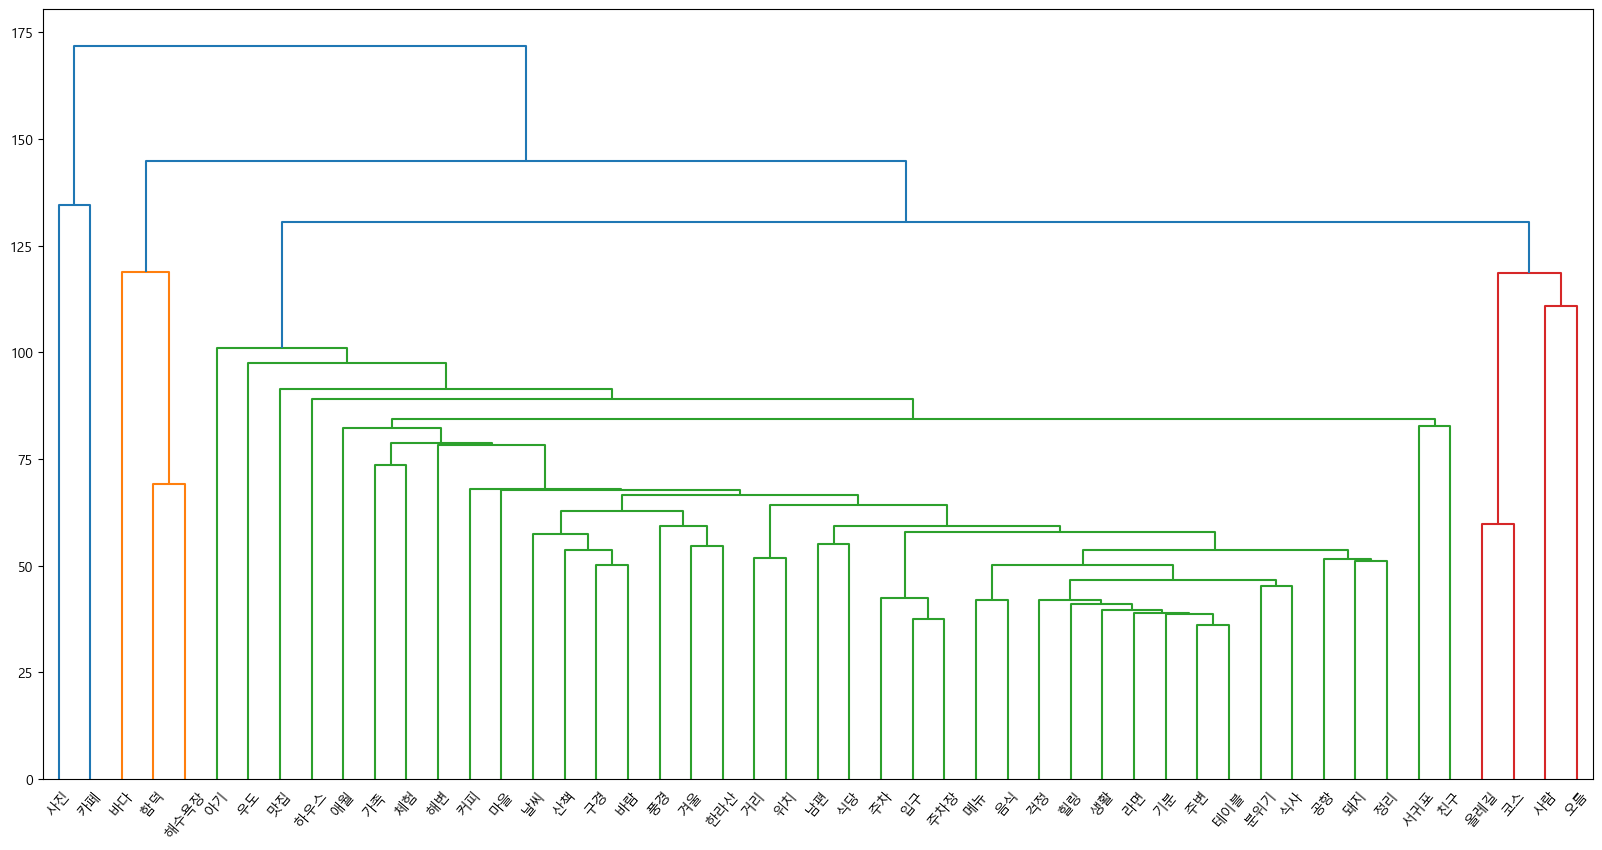

In [54]:
# 군집 방식은 ward로 거리는 유크리디안으로 측정해 군집분석

clusters = linkage(df_words, method='ward', metric='euclidean')

# 덴드로그램 그리기

plt.figure(figsize=(20, 10))               # 이미지 크기 설정
dendrogram(clusters,
           leaf_rotation=50,               # 라벨 50% 기울리기
           leaf_font_size=10,              # 라벨 폰트 크기
           labels=df_words.index)          # 라벨에 사용할 변수


plt.savefig('./result/type_hier_ver1.png')


In [38]:
from sklearn.cluster import AgglomerativeClustering



ward = AgglomerativeClustering(n_clusters=cluster_num, affinity='euclidean', linkage='ward')
predict = ward.fit_predict(df_words)      # 군집 3개 분리값(0, 1, 2)
df_words['predict'] = predict             # 해당 군집값(0, 1, 2)을 원본 데이터에 붙이기
df_words[:5]

d:\song\venvs\project1\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,1925,1926,1927,1928,1929,1930,1931,1932,1933,predict
가족,0,1,0,2,0,0,5,1,1,5,...,0,0,1,0,0,0,0,0,0,1
거리,0,0,0,0,2,0,5,1,0,0,...,0,0,0,0,0,0,0,1,2,1
걱정,0,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,1,0,0,0,1
겨울,0,0,0,1,0,0,1,0,4,2,...,0,4,0,0,0,2,0,0,0,1
공항,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [28]:
cluster_1 = df_words[df_words['predict'] == 0].index
print("군집 1: ", cluster_1)
cluster_2 = df_words[df_words['predict'] == 1].index
print("군집 2: ", cluster_2)
cluster_3 = df_words[df_words['predict'] == 2].index
print("군집 3: ", cluster_3)
cluster_4 = df_words[df_words['predict'] == 3].index
print("군집 4: ", cluster_4)
cluster_5 = df_words[df_words['predict'] == 4].index
print("군집 5: ", cluster_5)
# cluster_6 = df_words[df_words['predict'] == 5].index
# print("군집 6: ", cluster_6)
# cluster_7 = df_words[df_words['predict'] == 6].index
# print("군집 7: ", cluster_7)

군집 1:  Index(['바다', '함덕', '해수욕장'], dtype='object')
군집 2:  Index(['가족', '거리', '걱정', '겨울', '공항', '구경', '기분', '날씨', '남편', '돼지', '라면', '마을',
       '맛집', '메뉴', '바람', '분위기', '산책', '생활', '서귀포', '식당', '식사', '아기', '애월',
       '우도', '위치', '음식', '입구', '정리', '주변', '주차', '주차장', '체험', '친구', '커피',
       '테이블', '풍경', '하우스', '한라산', '해변', '힐링'],
      dtype='object')
군집 3:  Index(['사람', '오름', '올레길', '코스'], dtype='object')
군집 4:  Index(['사진'], dtype='object')
군집 5:  Index(['카페'], dtype='object')


In [56]:
temp_hier = []
for i in range(cluster_num):
    temp = i, df_words[df_words['predict'] == i].index.to_list()
    temp_hier.append(temp)

df_hier = pd.DataFrame(temp_hier)
df_hier.columns = ['group', 'keyword']
df_hier 

,group,keyword
0,0,"[바다, 함덕, 해수욕장]"
1,1,"[가족, 거리, 걱정, 겨울, 공항, 구경, 기분, 날씨, 남편, 돼지, 라면, 마..."
2,2,"[사람, 오름, 올레길, 코스]"
3,3,[사진]
4,4,[카페]


In [45]:
df_hier.to_csv('./result/type_hier_ver1.csv', index= False)

['바다', '함덕', '해수욕장']

### 분류 3 - K-Means Clustering

In [57]:
df_tdm['total'] = df_tdm.sum(axis=1)     # 단어 총 빈도수 계산
df_words = df_tdm[df_tdm['total'].rank(ascending=False) <= 50] # 빈도수 상위 50개 추출
df_words= df_words.drop('total', axis=1)    # 컬럼 'total' 제거
df_words[:5]

,0,1,2,3,4,5,6,7,8,9,...,1924,1925,1926,1927,1928,1929,1930,1931,1932,1933
가족,0,1,0,2,0,0,5,1,1,5,...,0,0,0,1,0,0,0,0,0,0
거리,0,0,0,0,2,0,5,1,0,0,...,0,0,0,0,0,0,0,0,1,2
걱정,0,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,1,0,0,0
겨울,0,0,0,1,0,0,1,0,4,2,...,0,0,4,0,0,0,2,0,0,0
공항,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [58]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters= 5)   # default: euclidean 거리
predict = kmeans.fit_predict(df_words)    # k-means 분석으로 군집 3개 분리(0, 1, 2)     
df_words['predict'] = predict             # 해당 군집값(0, 1, 2)을 원본 데이터에 붙이기
print(df_words[:5])

d:\song\venvs\project1\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


    0  1  2  3  4  5  6  7  8  9  ...  1925  1926  1927  1928  1929  1930  \
가족  0  1  0  2  0  0  5  1  1  5  ...     0     0     1     0     0     0   
거리  0  0  0  0  2  0  5  1  0  0  ...     0     0     0     0     0     0   
걱정  0  0  0  0  0  0  0  0  3  0  ...     0     0     0     0     0     1   
겨울  0  0  0  1  0  0  1  0  4  2  ...     0     4     0     0     0     2   
공항  0  0  0  0  0  0  1  0  0  0  ...     0     0     0     0     0     0   

    1931  1932  1933  predict  
가족     0     0     0        0  
거리     0     1     2        0  
걱정     0     0     0        0  
겨울     0     0     0        0  
공항     0     0     1        0  

[5 rows x 1935 columns]


In [59]:
# 주성분 분석(PCA)을 이용해 단어별 x, y 좌표 얻기

from sklearn.decomposition import PCA

pca = PCA(n_components=2)                         # 2차원 PCA 모델 설정
word_pca = pca.fit_transform(df_words.iloc[0:, :-1])    # 군집 변수('predict')를 제외하고 PCA 실행)
df_pca = pd.DataFrame(data=word_pca, index=[df_words.index], columns=['main1', 'main2'])
df_pca['predict']= predict
df_pca.tail()

,main1,main2,predict
한라산,-10.132582,-6.970287,0
함덕,13.555447,14.632581,4
해변,0.133306,-4.678638,0
해수욕장,10.970908,6.219424,4
힐링,-7.996536,0.912409,0


d:\song\venvs\project1\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
d:\song\venvs\project1\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_9120\3489881122.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(df_pca.main1[i], df_pca.main2[i], index)
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_9120\3489881122.py:11: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig('./result/type_kmeans_ver1.png')
d:\song\venvs\project1\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current fo

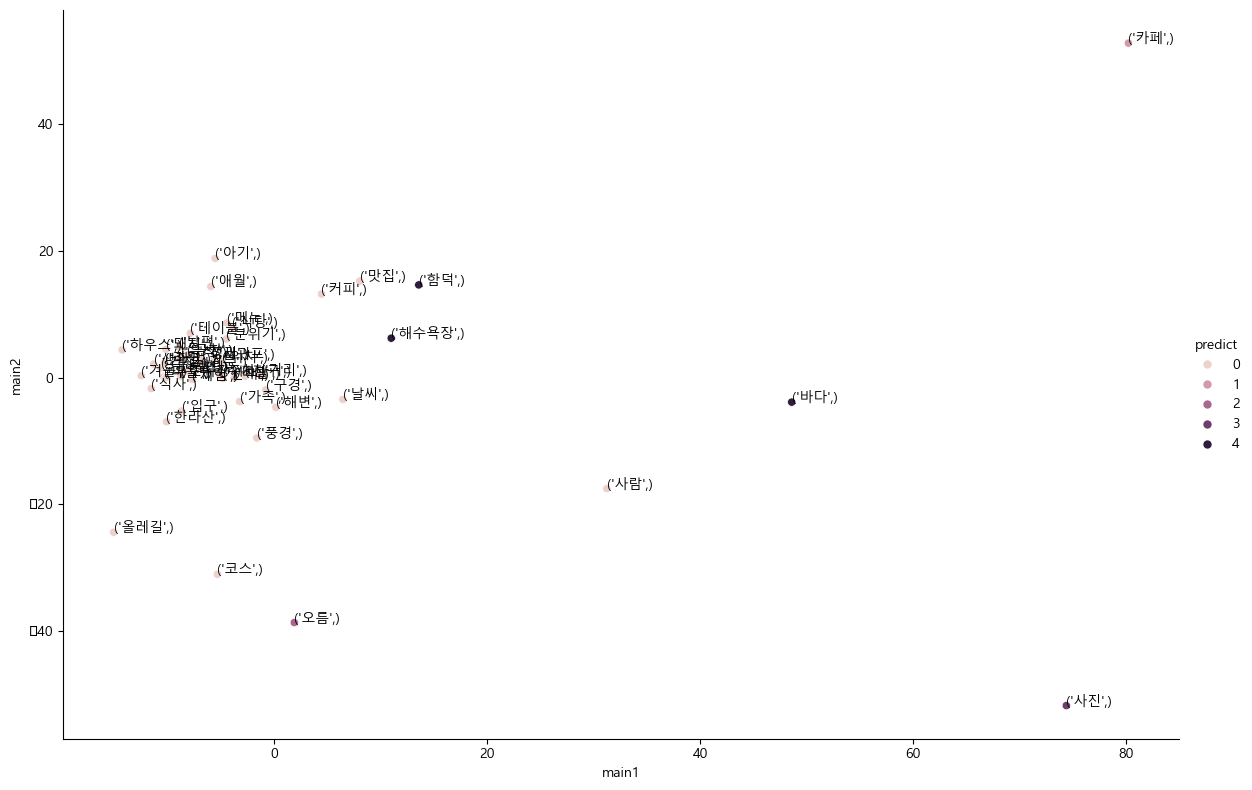

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# seaborn을 이용해 산점도 그리기
sns.relplot(data = df_pca, x='main1',y= 'main2', height =8, aspect=1.5, hue='predict') 

# 산점도에 라벨링하기
for i, index in enumerate(df_pca.index):
  plt.text(df_pca.main1[i], df_pca.main2[i], index)

plt.savefig('./result/type_kmeans_ver1.png')

In [ ]:
# cluster_1 = df_pca[df_pca['predict'] == 0].index
# print("군집 1: ", cluster_1)
# cluster_2 = df_pca[df_pca['predict'] == 1].index
# print("군집 2: ", cluster_2)
# cluster_3 = df_pca[df_pca['predict'] == 2].index
# print("군집 3: ", cluster_3)
# cluster_4 = df_pca[df_pca['predict'] == 3].index
# print("군집 4: ", cluster_4)
# cluster_5 = df_pca[df_pca['predict'] == 4].index
# print("군집 5: ", cluster_5)
# # cluster_6 = df_pca[df_pca['predict'] == 5].index
# # print("군집 6: ", cluster_6)

In [62]:
for i in range(10):
    temp = df_pca[df_pca['predict'] == i].index
    lis = []
    for j in temp:
        lis.append(j[0])
    print(f'군집{i}', lis)

군집0 ['가족', '거리', '걱정', '겨울', '공항', '구경', '기분', '날씨', '남편', '돼지', '라면', '마을', '맛집', '메뉴', '바람', '분위기', '사람', '산책', '생활', '서귀포', '식당', '식사', '아기', '애월', '올레길', '우도', '위치', '음식', '입구', '정리', '주변', '주차', '주차장', '체험', '친구', '커피', '코스', '테이블', '풍경', '하우스', '한라산', '해변', '힐링']
군집1 ['카페']
군집2 ['오름']
군집3 ['사진']
군집4 ['바다', '함덕', '해수욕장']
군집5 []
군집6 []
군집7 []
군집8 []
군집9 []


In [63]:
temp_kmean = []
for i in range(cluster_num):
    temp = i, df_words[df_words['predict'] == i].index.to_list()
    temp_kmean.append(temp)

df_kmean = pd.DataFrame(temp_kmean)
df_kmean.columns = ['group', 'keyword']
df_kmean 

,group,keyword
0,0,"[가족, 거리, 걱정, 겨울, 공항, 구경, 기분, 날씨, 남편, 돼지, 라면, 마..."
1,1,[카페]
2,2,[오름]
3,3,[사진]
4,4,"[바다, 함덕, 해수욕장]"


In [ ]:
df_kmean.to_csv('./result/type_kmeans_ver1.csv', index=False)